In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline

In [8]:
fruits = pd.read_table('assets/fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [9]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [ ]:
# get a mapping of fruit label to fruit name
fruit_name_mapping = dict(zip(fruits["fruit_label"].unique(), fruits["fruit_name"].unique()))
fruit_name_mapping

{np.int64(1): 'apple',
 np.int64(2): 'mandarin',
 np.int64(3): 'orange',
 np.int64(4): 'lemon'}

In [6]:
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6

In [34]:
# Predicting the labels for the test set
y_pred = knn.predict(X_test)

# I want to see the predicted labels along with the actual labels
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
X_test.merge(results, left_index=True, right_index=True).head(100)

,mass,width,height,color_score,Actual,Predicted
26,362,9.6,9.2,0.74,3,3
35,150,7.1,7.9,0.75,3,1
43,194,7.2,10.3,0.70,4,4
28,140,6.7,7.1,0.72,3,3
11,172,7.1,7.6,0.92,1,1
2,176,7.4,7.2,0.60,1,1
34,142,7.6,7.8,0.75,3,3
46,216,7.3,10.2,0.71,4,3
40,154,7.1,7.5,0.78,3,3
22,140,7.3,7.1,0.87,1,3


k=1, accuracy=0.6
k=2, accuracy=0.5333333333333333
k=3, accuracy=0.5333333333333333
k=4, accuracy=0.5333333333333333
k=5, accuracy=0.5333333333333333
k=6, accuracy=0.6
k=7, accuracy=0.5333333333333333
k=8, accuracy=0.4666666666666667
k=9, accuracy=0.5333333333333333
k=10, accuracy=0.3333333333333333
k=11, accuracy=0.3333333333333333
k=12, accuracy=0.3333333333333333
k=13, accuracy=0.26666666666666666
k=14, accuracy=0.3333333333333333
k=15, accuracy=0.26666666666666666
k=16, accuracy=0.26666666666666666
k=17, accuracy=0.26666666666666666
k=18, accuracy=0.26666666666666666
k=19, accuracy=0.26666666666666666
k=20, accuracy=0.26666666666666666


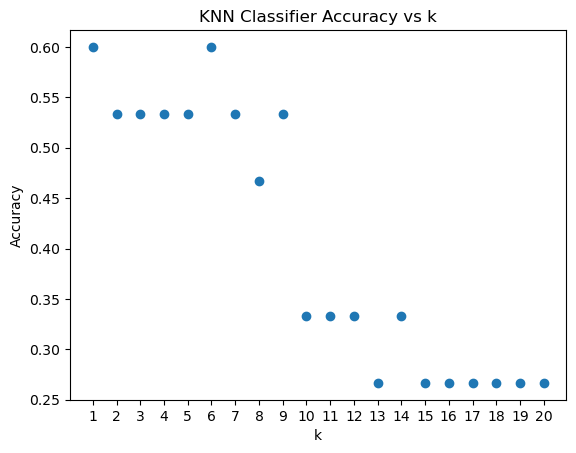

In [42]:
r = range(1, 21)

x = []
y = []

for k in r:
    x.append(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y.append(knn.score(X_test, y_test))
    print(f'k={k}, accuracy={y[-1]}')
    
plt.scatter(x, y, marker='o', linestyle='-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy vs k')
plt.xticks(x)
# plt.grid()
plt.show()